In [3]:
# Dependencies and Setup
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import date
import calendar
import datetime

import requests
from config import api_key

import matplotlib.pyplot as plt

In [4]:
# File to Load (bitcoin historical price)
bitcoin = "Resources/BTC-USD.csv"
# bitcoin = "BTC-USD.csv"

# Read csv File and store into dataframe
bitcoin_df = pd.read_csv(bitcoin)

bitcoin_df["Date"] = pd.to_datetime(bitcoin_df["Date"])
bitcoin_df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object

In [5]:
# Binning the dates by year
bins = [np.datetime64("2016-01-01"),np.datetime64("2016-12-31"),\
        np.datetime64("2017-12-31"),np.datetime64("2018-12-31"),\
        np.datetime64("2019-12-31"),np.datetime64("2020-12-31"),\
        np.datetime64("2021-12-31")]


group_name = ["2016","2017","2018","2019","2020","2021"]


#slice the data into bins
bitcoin_df["Year"] = pd.cut(bitcoin_df["Date"],bins, labels=group_name,right = True)
bitcoin_df.head()


,Date,Open,High,Low,Close,Adj Close,Volume,Year
0,2016-10-30,714.117981,714.117981,696.474976,701.864014,701.864014,100665000.0,2016
1,2016-10-31,702.640015,709.289001,691.682007,700.971985,700.971985,97064400.0,2016
2,2016-11-01,701.336975,736.452026,701.336975,729.793030,729.793030,130527000.0,2016
3,2016-11-02,730.065979,740.828979,722.348999,740.828979,740.828979,84865200.0,2016
4,2016-11-03,742.346008,745.773010,678.156006,688.700012,688.700012,172808000.0,2016


In [6]:
# chainging the date format 
bitcoin_df["Date"] = pd.to_datetime(bitcoin_df["Date"]).dt.strftime('%Y%m%d')


In [7]:
years = ["2016","2017","2018","2019","2020","2021"]

year = []
max_date = []
min_date = []
max_price = []
min_price = []

for x in years:
    #filtering dataframe by year
    df = bitcoin_df.loc[bitcoin_df["Year"]==x]
    
    #filtering dataframe to find the date with maximum price within a given year
    df_max = df.loc[df["Close"] == df["Close"].max()]
    year.append(x)
    
    #storing date of max price by year into array
    max_date.append(df_max["Date"].item())
    
    #storing max price by year into array
    max_price.append(df_max["Close"].max())
    
    #filtering dataframe to find the date with min price within a given year
    df_min = df.loc[df["Close"] == df["Close"].min()]
    
    #storing date of min price by year into array
    min_date.append(df_min["Date"].item())
    #storing min price by year into array
    min_price.append(df["Close"].min())



In [8]:
#creating dataframe
min_max_dict = {
    "Year" : year,
    "Max_Date":max_date,
    "Max_Price":max_price,
    "Min_Date":min_date,
    "Min_Price":min_price
}

min_max_df = pd.DataFrame(min_max_dict)
min_max_df

,Year,Max_Date,Max_Price,Min_Date,Min_Price
0,2016,20161228,975.921021,20161103,688.700012
1,2017,20171216,19497.400390,20170111,777.757019
2,2018,20180106,17527.000000,20181215,3236.761719
3,2019,20190626,13016.231450,20190207,3399.471680
4,2020,20201231,29001.720700,20200312,4970.788086
5,2021,20211020,65992.835940,20210101,29374.152340


In [9]:
# api search from nytimes
url = "https://api.nytimes.com/svc/search/v2/articlesearch.json?"

# Store a search term
# query = "crypto-currency"
query = "bitcoin"

max_pubdate = []
min_pubdate = []
max_snippet = []
min_snippet = []

day = 7

# Search for articles published between a begin and end date and storing into a list
# Retrieve first article that is most relevant and print publish date/snippet

for x in range(len(min_max_df)):
    try:
        begin_date = min_max_df.iloc[x, 1]
        end_date = int((datetime.datetime.strptime(str(begin_date),"%Y%m%d") + datetime.timedelta(days=day)).strftime("%Y%m%d"))
        query_url = f"{url}api-key={api_key}&q={query}&begin_date={begin_date}&end_date={end_date}&sort=relevance"
    #     print(query_url)

        # Retrieve articles
        articles = requests.get(query_url).json()
        articles_list = articles["response"]["docs"]

        
        print(articles_list[0]["pub_date"])
        print(articles_list[0]["snippet"])
        
        max_pubdate.append(articles_list[0]["pub_date"])
        max_snippet.append(articles_list[0]["snippet"])
    except:
        print(f"No article found for this date")
        max_pubdate.append("N/A")
        max_snippet.append("N/A")

print("------------------------------------------------")
        
for x in range(len(min_max_df)):
    try:
        begin_date = min_max_df.iloc[x, 3]
        end_date = int((datetime.datetime.strptime(str(begin_date),"%Y%m%d") + datetime.timedelta(days=day)).strftime("%Y%m%d"))
        query_url = f"{url}api-key={api_key}&q={query}&begin_date={begin_date}&end_date={end_date}&sort=relevance"
    #     print(query_url)

        # Retrieve articles
        articles = requests.get(query_url).json()
        articles_list = articles["response"]["docs"]

        # Retrieve first article that is most relevant
        print(articles_list[0]["pub_date"])
        print(articles_list[0]["snippet"])
    
        min_pubdate.append(articles_list[0]["pub_date"])
        min_snippet.append(articles_list[0]["snippet"])
    except:
        print(f"No article found for this date")
        min_pubdate.append("N/A")
        min_snippet.append("No article found")

2017-01-04T01:04:51+0000
A tilt toward isolationism in American and European politics has made a currency that can cross borders with little oversight more attractive.
2017-12-19T10:00:21+0000
The Pantera Bitcoin Fund was set up in 2013, when few on Wall Street were interested in cryptocurrencies. It has since ridden the Bitcoin wave to blockbuster returns.
2018-01-12T12:13:59+0000
The government says it is looking at banning virtual currency trades. But it isn’t clear whether, or how quickly, it will follow through.
2019-06-28T09:00:08+0000
“Unlike some of my hard science fiction books, such as ‘Seveneves’ — where I sweated the details of orbits, rocket engines, etc. — ‘Fall’ is meant to be read as more of a fable,” he says.
2021-01-04T12:18:31+0000
Awkward questions for the companies that donated to senators planning to challenge the 2020 election results.
2021-10-25T19:23:13+0000
What does it mean now that cryptocurrency has joined proper society?
-----------------------------------

In [10]:
# print(max_pubdate)
# print(max_snippet)
# print(min_pubdate)
# print(min_snippet)

In [11]:
# adding the output to existing dataframe
min_max_df["max_pubdate"]=max_pubdate
min_max_df["max_snippet"]=max_snippet
min_max_df["min_pubdate"]=min_pubdate
min_max_df["min_snippet"]=min_snippet
min_max_df

,Year,Max_Date,Max_Price,Min_Date,Min_Price,max_pubdate,max_snippet,min_pubdate,min_snippet
0,2016,20161228,975.921021,20161103,688.700012,2017-01-04T01:04:51+0000,A tilt toward isolationism in American and Eur...,2016-11-09T11:02:35+0000,The uncertainty created by the result has prop...
1,2017,20171216,19497.400390,20170111,777.757019,2017-12-19T10:00:21+0000,"The Pantera Bitcoin Fund was set up in 2013, w...",N/A,No article found
2,2018,20180106,17527.000000,20181215,3236.761719,2018-01-12T12:13:59+0000,The government says it is looking at banning v...,2018-12-22T00:24:20+0000,As the rabble-rousing leader of the Cypherpunk...
3,2019,20190626,13016.231450,20190207,3399.471680,2019-06-28T09:00:08+0000,"“Unlike some of my hard science fiction books,...",2019-02-10T19:52:49+0000,A generation of the young with dead-end social...
4,2020,20201231,29001.720700,20200312,4970.788086,2021-01-04T12:18:31+0000,Awkward questions for the companies that donat...,N/A,No article found
5,2021,20211020,65992.835940,20210101,29374.152340,2021-10-25T19:23:13+0000,What does it mean now that cryptocurrency has ...,N/A,No article found


In [12]:
#changing date format
min_max_df["Max_Date"] = pd.to_datetime(min_max_df["Max_Date"]).dt.strftime('%Y/%m/%d')
min_max_df["Min_Date"] = pd.to_datetime(min_max_df["Min_Date"]).dt.strftime('%Y/%m/%d')
min_max_df.dtypes

Year            object
Max_Date        object
Max_Price      float64
Min_Date        object
Min_Price      float64
max_pubdate     object
max_snippet     object
min_pubdate     object
min_snippet     object
dtype: object

In [13]:
# Filtering dataframe that does not contain N/A
df1 = min_max_df[min_max_df["max_pubdate"] != "N/A"]
df2 = min_max_df[min_max_df["min_pubdate"] != "N/A"]
df2.columns


Index(['Year', 'Max_Date', 'Max_Price', 'Min_Date', 'Min_Price', 'max_pubdate',
       'max_snippet', 'min_pubdate', 'min_snippet'],
      dtype='object')

In [14]:
# Changing Date Format
bitcoin_df["Date"] = pd.to_datetime(bitcoin_df["Date"]).dt.strftime('%Y/%m/%d')
bitcoin_df

,Date,Open,High,Low,Close,Adj Close,Volume,Year
0,2016/10/30,714.117981,714.117981,696.474976,701.864014,701.864014,1.006650e+08,2016
1,2016/10/31,702.640015,709.289001,691.682007,700.971985,700.971985,9.706440e+07,2016
2,2016/11/01,701.336975,736.452026,701.336975,729.793030,729.793030,1.305270e+08,2016
3,2016/11/02,730.065979,740.828979,722.348999,740.828979,740.828979,8.486520e+07,2016
4,2016/11/03,742.346008,745.773010,678.156006,688.700012,688.700012,1.728080e+08,2016
...,...,...,...,...,...,...,...,...
1822,2021/10/26,63032.761720,63229.027340,59991.160160,60363.792970,60363.792970,3.487897e+10,2021
1823,2021/10/27,60352.000000,61435.183590,58208.187500,58482.386720,58482.386720,4.365708e+10,2021
1824,2021/10/28,58470.730470,62128.632810,58206.917970,60622.136720,60622.136720,4.525708e+10,2021
1825,2021/10/29,60624.871090,62927.609380,60329.964840,62227.964840,62227.964840,3.685688e+10,2021


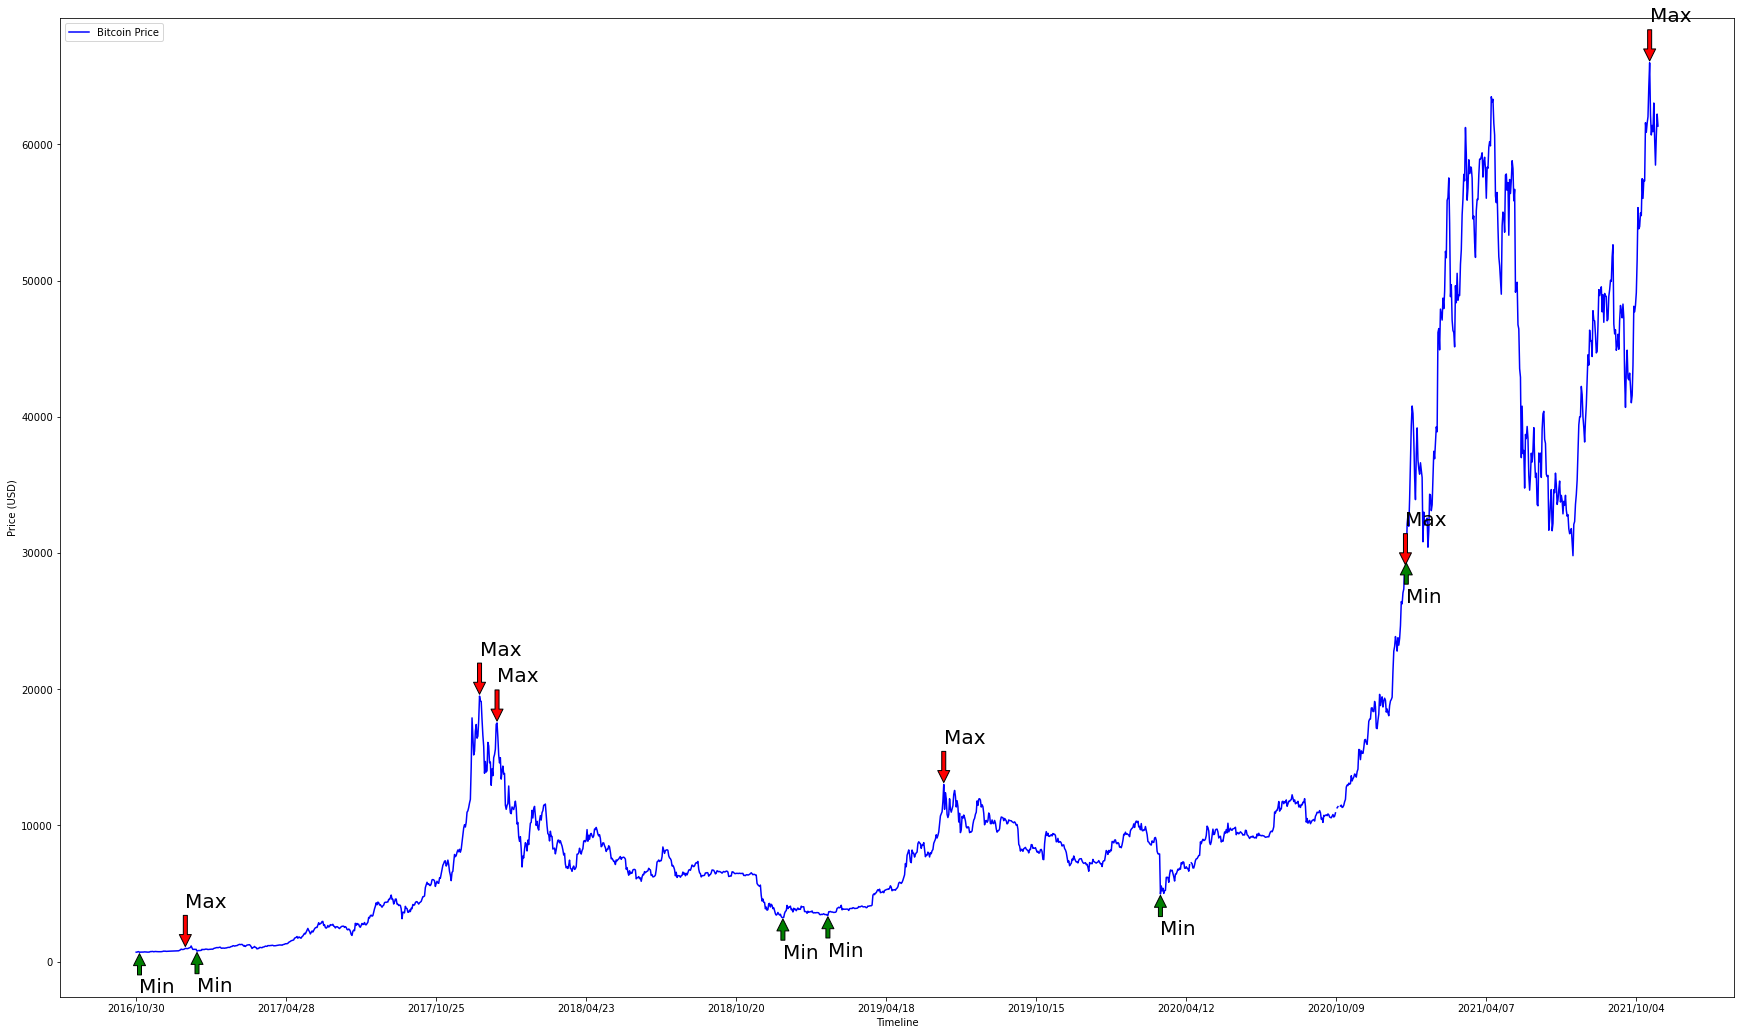

In [15]:
# creating a line plot to show bitcoin price over the last 5 years

# fig = plt.figure(figsize=(20,12))
plt.rcParams["figure.figsize"] = (30, 18)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(bitcoin_df["Date"],bitcoin_df["Close"], color="blue", label="Bitcoin Price")
ax.set_xticks(np.arange(0, len(bitcoin_df)+1, 180))

df = min_max_df

for x in range(len(df)):
    ax.annotate("Max", xy=(df.iloc[x, 1], df.iloc[x, 2]),\
                xytext=(df.iloc[x, 1], df.iloc[x, 2]+3000),fontsize=20, \
                arrowprops=dict(facecolor='red', shrink=0.05))
    
    
for x in range(len(df)):
    ax.annotate("Min", xy=(df.iloc[x, 3], df.iloc[x, 4]),\
                xytext=(df.iloc[x, 3], df.iloc[x, 4]-3000),fontsize=20, \
                arrowprops=dict(facecolor='green', shrink=0.05))


plt.legend(loc="upper left")

plt.xlabel("Timeline", fontsize =10)
plt.ylabel("Price (USD)", fontsize =10)
plt.savefig("Output/Bitcoin_NYTimes1.png")
plt.show()


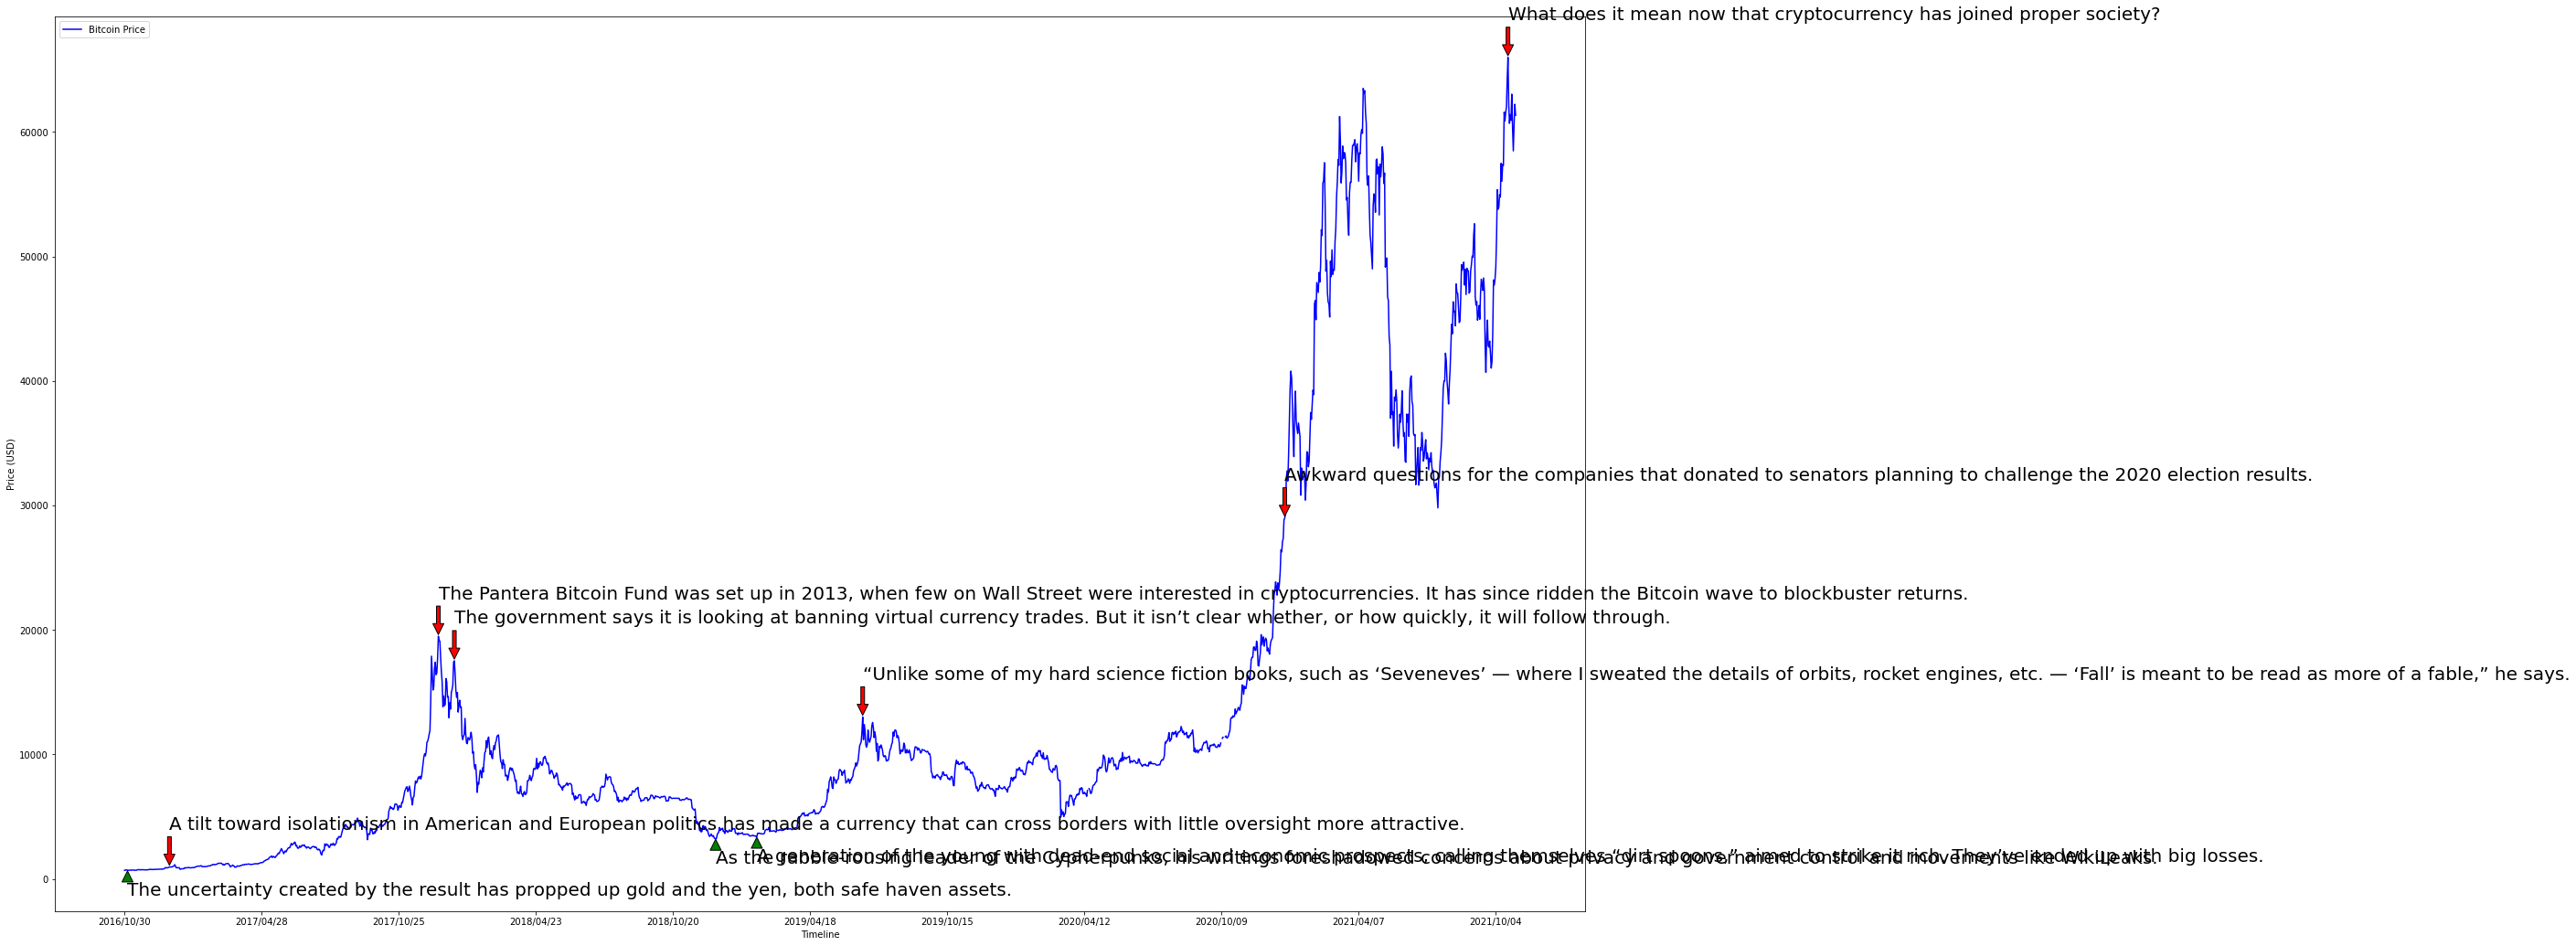

In [32]:
# creating a line plot to show bitcoin price over the last 5 years
# overlaying different articles published during the max/min price points

# fig = plt.figure(figsize=(20,12))
plt.rcParams["figure.figsize"] = (30, 18)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(bitcoin_df["Date"],bitcoin_df["Close"], color="blue", label="Bitcoin Price")
ax.set_xticks(np.arange(0, len(bitcoin_df)+1, 180))

for x in range(len(df1)):
    ax.annotate(df1.iloc[x, 6], xy=(df1.iloc[x, 1], df1.iloc[x, 2]),\
                xytext=(df1.iloc[x, 1], df1.iloc[x, 2]+3000),fontsize=20, \
                arrowprops=dict(facecolor='red', shrink=0.05))

for x in range(len(df2)):
    ax.annotate(df2.iloc[x, 8], xy=(df2.iloc[x, 3], df2.iloc[x, 4]),\
                xytext=(df2.iloc[x, 3], df2.iloc[x, 4]-2000),fontsize=20, \
                arrowprops=dict(facecolor='green', shrink=0.05))

    

plt.legend(loc="upper left")

plt.xlabel("Timeline", fontsize =10)
plt.ylabel("Price (USD)", fontsize =10)
plt.savefig("Output/Bitcoin_NYTimes2.png")
plt.show()
